In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
Insurance = pd.read_csv("insurance.csv")
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).
Insurance_one_hot = pd.get_dummies(Insurance).astype(int)
Insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [4]:
X = Insurance_one_hot.drop("charges", axis =1)
y = Insurance_one_hot["charges"]

In [5]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)

In [7]:
tf.random.set_seed(42)

Insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

Insurance_model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

history_1 = Insurance_model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10406.4033 - mae: 10406.4033   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7308.5957 - mae: 7308.5957 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7326.8848 - mae: 7326.8848 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7327.9209 - mae: 7327.9209 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7096.8364 - mae: 7096.8364 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7306.6802 - mae: 7306.6802 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7286.2686 - mae: 7286.2686 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7260.9888 - mae: 7260.9888 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7205.8735 - mae: 7205.8735 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7239.2573 - mae: 7239.2573 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7388.4966 - mae: 7388.4966 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━

In [8]:
Insurance_model_1.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6673.2681 - mae: 6673.2681  


[6658.27001953125, 6658.27001953125]

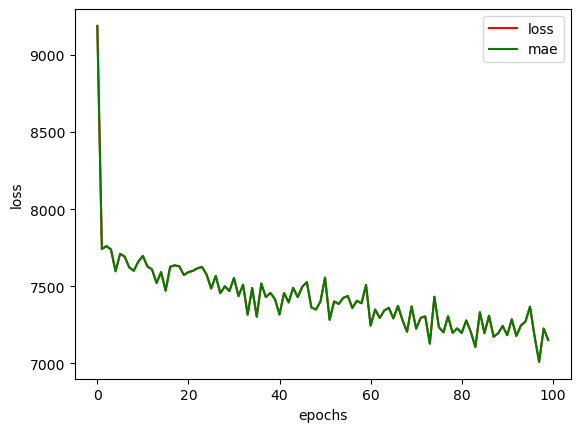

In [9]:
pd.DataFrame(history_1.history).plot(color=['red', 'green'])
plt.ylabel("loss")
plt.xlabel("epochs");

#MAE and loss are the same, hence the lines in the plot overlap eachother.

In [10]:
tf.random.set_seed(42)

Insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

Insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

history_2 = Insurance_model_2.fit(X_train, y_train, epochs = 200, verbose = 0)

In [11]:
Insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3513.1431 - mae: 3513.1431  


[3406.06494140625, 3406.06494140625]

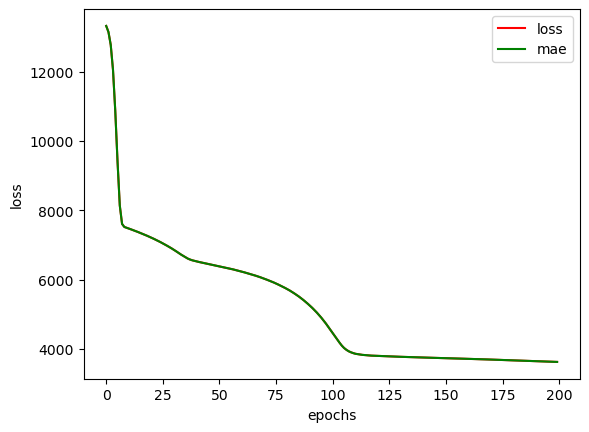

In [12]:
pd.DataFrame(history_2.history).plot(color=['red', 'green'])
plt.ylabel("loss")
plt.xlabel("epochs");

#MAE and loss are the same, hence the lines in the plot overlap eachother.

In [13]:
tf.random.set_seed(42)

Insurance_model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10,  activation="relu"),
    tf.keras.layers.Dense(1)
])

Insurance_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

history_3 = Insurance_model_3.fit(X_train, y_train, epochs = 300, verbose = 0)

In [14]:
Insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3301.2524 - mae: 3301.2524  


[3299.451416015625, 3299.451416015625]